We will Use XGBoost Regressor Model

It is a type of decision tree type Regression Model.

Importing the Dependencies

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Importing the Boston House Price Dataset

In [29]:
# house_price_dataset = sklearn.datasets.load_boston()      # This dataset is now giving an error .
                                                          # so we have to get data from another method.

In [30]:
# From this method you can get dataset now.

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [31]:
print(raw_df)
print(data)
print(target)

             0      1      2    3      4      5     6       7    8      9   \
0       0.00632  18.00   2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1     396.90000   4.98  24.00  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
2       0.02731   0.00   7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
3     396.90000   9.14  21.60  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
4       0.02729   0.00   7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
...         ...    ...    ...  ...    ...    ...   ...     ...  ...    ...   
1007  396.90000   5.64  23.90  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
1008    0.10959   0.00  11.93  0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
1009  393.45000   6.48  22.00  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
1010    0.04741   0.00  11.93  0.0  0.573  6.030  80.8  2.5050  1.0  273.0   
1011  396.90000   7.88  11.90  NaN    NaN    NaN   NaN     NaN  NaN    NaN   

        10  
0     15.3  
1      NaN  
2     17.8  
3      NaN 

Loading the dataset into a pandas dataframe

In [32]:
house_price_dataframe = pd.DataFrame(data)
price = pd.DataFrame(target)

In [33]:
# printing first 5 rows of the dataframe and Target

print(house_price_dataframe.head())
print(price.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  
      0
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


In [34]:
# adding the target(price) column to the dataframe

house_price_dataframe[13] = price

In [35]:
# Final dataFrame's first 5 rows

house_price_dataframe.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [36]:
# Checking the no of rows and columns in the dataframe

house_price_dataframe.shape

(506, 14)

In [37]:
# Check for missing values

house_price_dataframe.isnull().sum()        # isnull() shows the misssing values in the dataset
                                            # sum will add the missing values

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


As there is no missing valkues so we don't have to do preprocessings as well

In [38]:
# Statistical measure of the dataset

house_price_dataframe.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


25% means 25% of the values are less than that value at 25%

50% means 50% of the values are less than that value at 50% as so on...

mean shows mean, std shows standard deviation, min and max shows the min and max values at that column.

Each of the values are calulated among all the rows at column level.

In [39]:
# Statistical measure of the dataset

house_price_dataframe.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Understanding the corelation between varius features in the dataset



   **1-** **Positive Corelation**  :- On increasing one value other is also increasing.




   **2-** **Negative corelation**  :- On increasing one value others are also increasing.

In [40]:
correlation = house_price_dataframe.corr()        # finds the corelation between all the features.


<Axes: >

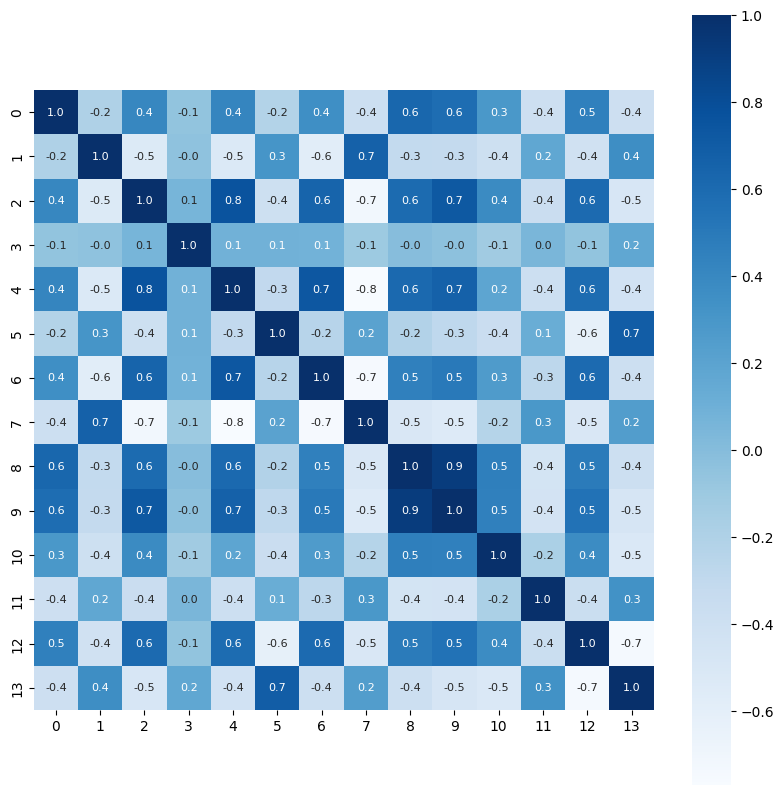

In [41]:
# constructing a heapmap to understand the correlation

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square = True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

# cbar means colorbar in the RHS
# square means all the values mentioned in a square
# fmt how many float after decimal you want
# annot means features and other names inside the box
# annot_kws means size of the annotation inside the box (and fetures names too)
# cmap means of the heat_map

whites are negatively corelated and

blues are positively correlated

Splitting the data anb the target.

In [42]:
X = house_price_dataframe.drop(columns=13, axis =1)     # here column no 13 is dropped as it is the target value
Y = house_price_dataframe[13]                           # here target value is stored in Y varible
print(X.head())
print(Y.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: 13, dtype: float64


Splitting the data into training data and test data


In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)    # 20% test and remaining 80% training data
                                                                                            # random state is a ways in which our data should be splitted(fix and certain)

In [44]:
print(X.shape,X_train.shape,X_test.shape)

(506, 13) (404, 13) (102, 13)


Model Training

In [45]:
# loading the model

model = XGBRegressor()

In [46]:
# training the mdoel with X_train

model.fit(X_train,Y_train)      # fit() means training the model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

**Evaluation**

Prediction on training data

In [47]:
# accuracy for prediction on training data

training_data_prediction = model.predict(X_train)

In [48]:
print(training_data_prediction)

[23.112196  20.992601  20.10438   34.67932   13.920501  13.499354
 21.998383  15.206723  10.89543   22.67402   13.795236   5.602332
 29.808502  49.98666   34.89634   20.594336  23.388903  19.2118
 32.69294   19.604128  26.978151   8.405952  46.00062   21.70406
 27.084402  19.372278  19.297894  24.79984   22.608278  31.707775
 18.53683    8.703393  17.40025   23.698814  13.29729   10.504759
 12.693588  24.994888  19.694864  14.911037  24.20254   24.991112
 14.901547  16.987965  15.592753  12.704759  24.505623  15.007718
 49.999355  17.509344  21.18844   31.999287  15.606071  22.902134
 19.309835  18.697083  23.302961  37.19767   30.102247  33.117855
 20.993683  50.00471   13.40048    5.002565  16.50862    8.4016905
 28.651423  19.49218   20.595366  45.404697  39.808857  33.4055
 19.81498   33.406376  25.30206   49.998615  12.544487  17.433802
 18.602612  22.601418  50.004013  23.814182  23.313164  23.097467
 41.71243   16.112017  31.604454  36.09397    7.0009975 20.406271
 19.992195  12

In [49]:
# R squared error

score_1 = metrics.r2_score(Y_train, training_data_prediction)     # will find the r2 squared error.
                                                                  # r2_score() will work based on variance between the data

# Mean absolute error

score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)  # will find the mean square error

print("R squared error : ", score_1)
print("Mean Absolute Error : ", score_2)


R squared error :  0.9999980039471451
Mean Absolute Error :  0.0091330346494618


small values of error means model is doing well

Prediction on test data.

In [50]:
# accurracy for prediction on test data

test_data_prediction = model.predict(X_test)

In [51]:
# R squared error

score_3 = metrics.r2_score(Y_test, test_data_prediction)     # will find the r2 squared error.
                                                                  # r2_score() will work based on variance between the data

# Mean absolute error

score_4 = metrics.mean_absolute_error(Y_test, test_data_prediction)  # will find the mean square error

print("R squared error : ", score_3)
print("Mean Absolute Error : ", score_4)


R squared error :  0.9051721149855378
Mean Absolute Error :  2.0748727686264927


model is performing fine

error didn't changes much on trianing and test sets.

**Visulaising the actual Prices and predicted prices**

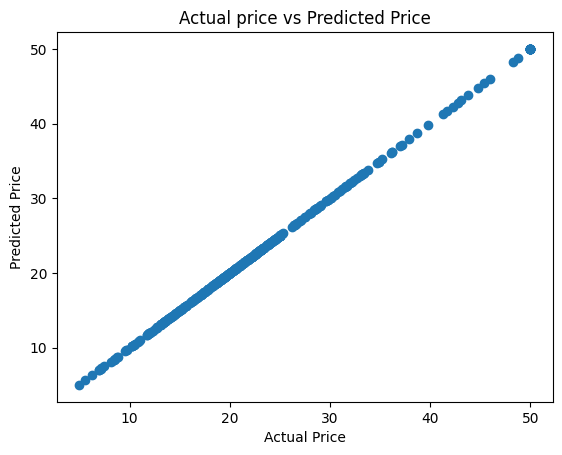

In [52]:
plt.scatter(Y_train, training_data_prediction)    # plotting the data point as points

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs Predicted Price")

plt.show()      # now graph wil

Predicting the price of a house...


In [54]:
X1 = np.array([[0.00632,	18.0,	2.31,	0.0, 0.538,	6.575,	65.2,	4.0900,	1.0,	296.0,	15.3,	396.90,	4.98]])
# actual predicted value is 24


y1 = model.predict(X1)
print(y1)

[23.99494]


now we can conclude that model is doing well
